## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# %matplotlib inline

In [9]:
# import matplotlib.pyplot as plt
# housing.hist(bins=20, figsize=(20, 15))

## Train Test splittng

In [10]:
# For learning pupose 
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 404
 Rows in test set: 102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [15]:
start_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
start_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
housing = start_train_set.copy()

## Looking For Correlations

In [18]:
corr_matrix = housing.corr() # .corr() it is correlations function in pandas library
corr_matrix['MEDV'].sort_values(ascending=False) # 1:strong correlation, -1:strong opposite correlation/ here we can see persion correlation coefficent

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09E8E1B0>,
      dtype=object)

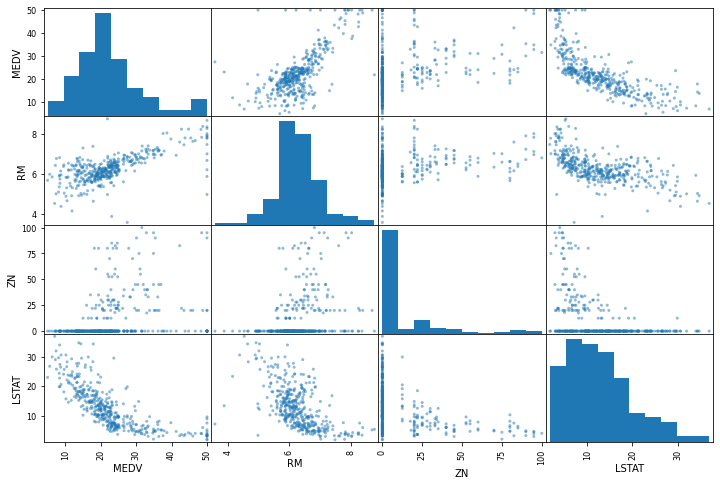

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12, 8))

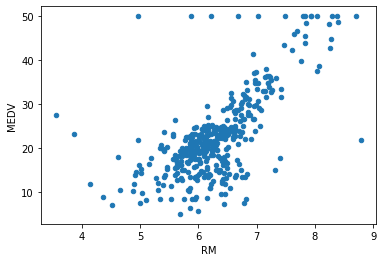

In [20]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=1)

## Trying out Attributes Combination

In [21]:
housing['TAXRM'] = housing["TAX"]/housing["RM"]

In [22]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [23]:
corr_matrix = housing.corr() # .corr() it is correlations function in pandas library
corr_matrix['MEDV'].sort_values(ascending=False) # 1:strong correlation, -1:strong opposite correlation/ here we can see persion correlation coefficent

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

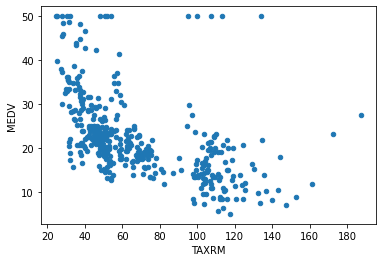

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=1)

In [25]:
housing = start_train_set.drop("MEDV", axis=1)
housing_label = start_train_set["MEDV"].copy()

## Missing Attributes

In [26]:
# To take care of missing attributes we have three option
# 1. Get rid of the missing data points
# 2. Get rid of the whole attribute
# 3. Set the value to some value (mean or median)

In [27]:
# hosuing.dropna("RM") option 1

In [28]:
# housing.drop("RM", axis=1) option 2

In [29]:
# option 3 to set median instead of nan value in Rm
# rmmedian = housing["RM"].median()-- compute median for missing value
# rmmedian
# housing["RM"].fillna(rmmedian)

* above mentioned option 3 is compute by sklearn unsing SimpleImputer class which is shown in below 

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_.shape

(13,)

In [32]:
x = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [34]:
# housing_tr.describe()
housing_tr.shape

(404, 13)

In [35]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

primarily, three types of objects
1. Estimators - it estimate some parameters based on dataset.Eg. imputer. it has fit() and transform() methods. fit()-fit the dataset and calculate parameters 

2. Transformer- ઈન્પુટ લેઈ અને return output કરે according to fit() method.એમાં convenience function છે it is called fit_transform() it does first fit dataset and then transform 
3. Predictor - LinearRigression model is example of Predictor object. and it contains fit() and predict() method.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max (Normalization)
   (value - min) / (max - min)
   Sklearn provides a class called MinMaxScaler for this
   
2. Standerdiazation
    (value - mean) / std
    Sklearn provides a class called StanderdScaler for this
     

## Creating a PipeLine

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [40]:
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_label =housing_label.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.48 , 25.244, 16.562, 23.6  , 23.539])

In [45]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating  the model

In [46]:
import numpy as np

In [47]:

from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [48]:
lin_mse

1.341450146039602

## using better validation technique - cross validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([2.73346129, 2.77263881, 4.48257499, 2.6744857 , 3.28183197,
       2.72613132, 4.69333722, 3.29941039, 3.01518273, 3.21306999])

In [51]:
def print_score(scores):
    print("Scores: ", scores)
    print("Mean: ",scores.mean())
    print("Standard Daviation: ", scores.std())
    

In [52]:
print_score(rmse_scores)

Scores:  [2.73346129 2.77263881 4.48257499 2.6744857  3.28183197 2.72613132
 4.69333722 3.29941039 3.01518273 3.21306999]
Mean:  3.2892124411719807
Standard Daviation:  0.6890127697658627


## Saving the model

In [53]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [57]:
x_test = start_test_set.drop('MEDV',axis=1)
y_test = start_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
fianl_mse = mean_squared_error(y_test, final_prediction)
fianl_rmse = np.sqrt(fianl_mse)

In [58]:
 fianl_rmse

2.9641208265706367